In [2]:
import pandas as pd
import numpy as np
import math, copy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_foods = pd.read_csv("data/onlinefoods.csv").drop("Unnamed: 12", axis=1)
df_foods

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive


In [4]:
df_foods.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [5]:
def null_count(df):

    df_nulls = {"columns": [], "qt_nulls": []}

    for column in df.columns:

        qt_nulls = df[column].isnull().sum()

        df_nulls["columns"].append(column)
        df_nulls["qt_nulls"].append(qt_nulls)
    
    return pd.DataFrame(df_nulls)

null_count(df_foods)

,columns,qt_nulls
0,Age,0
1,Gender,0
2,Marital Status,0
3,Occupation,0
4,Monthly Income,0
5,Educational Qualifications,0
6,Family size,0
7,latitude,0
8,longitude,0
9,Pin code,0


# OneHot Encoding

In [6]:
df_foods.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
dtype: object

In [7]:
string_columns = df_foods.select_dtypes(include=["object"]).columns

num_columns = df_foods.select_dtypes(exclude=["object"]).columns

In [8]:
df_encoded = pd.get_dummies(df_foods, columns=string_columns, drop_first=True).astype(int)
df_encoded

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive
0,20,4,12,77,560001,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
1,24,3,12,77,560009,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,22,3,12,77,560017,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,22,6,12,77,560019,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
4,22,4,12,77,560010,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12,77,560001,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
384,23,4,12,77,560048,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
385,22,5,12,77,560010,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
386,23,2,12,77,560009,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1


# Data Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_encoded[num_columns]), columns=num_columns)
df_norm


,Age,Family size,latitude,longitude,Pin code
0,0.133333,0.6,0.0,0.0,0.000000
1,0.400000,0.4,0.0,0.0,0.074074
2,0.266667,0.4,0.0,0.0,0.148148
3,0.266667,1.0,0.0,0.0,0.166667
4,0.266667,0.6,0.0,0.0,0.083333
...,...,...,...,...,...
383,0.333333,0.2,0.0,0.0,0.000000
384,0.333333,0.6,0.0,0.0,0.435185
385,0.266667,0.8,0.0,0.0,0.083333
386,0.333333,0.2,0.0,0.0,0.074074


In [11]:
df_final = df_encoded.copy()

for column in num_columns:

    df_final[column] = df_norm[column]

df_final

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive
0,0.133333,0.6,0.0,0.0,0.000000,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
1,0.400000,0.4,0.0,0.0,0.074074,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,0.266667,0.4,0.0,0.0,0.148148,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0.266667,1.0,0.0,0.0,0.166667,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0.266667,0.6,0.0,0.0,0.083333,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.333333,0.2,0.0,0.0,0.000000,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
384,0.333333,0.6,0.0,0.0,0.435185,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
385,0.266667,0.8,0.0,0.0,0.083333,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
386,0.333333,0.2,0.0,0.0,0.074074,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1


In [12]:
df_final.describe()

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive
count,388.000000,388.000000,388.000000,388.0,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,...,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,0.441924,0.456186,0.231959,0.0,0.362161,0.572165,0.030928,0.690722,0.023196,0.139175,...,0.177835,0.064433,0.159794,0.481959,0.059278,0.448454,0.030928,0.005155,0.775773,0.817010
std,0.198373,0.270205,0.422628,0.0,0.290737,0.495404,0.173346,0.462793,0.150720,0.346576,...,0.382868,0.245840,0.366888,0.500320,0.236450,0.497978,0.173346,0.071703,0.417611,0.387157
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.200000,0.000000,0.0,0.090278,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.400000,0.400000,0.000000,0.0,0.300926,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.533333,0.600000,0.000000,0.0,0.620370,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EAD

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
positives = sum(df_final["Feedback_Positive"])
negatives = len(df_final["Feedback_Positive"]) - positives

perc_positives = (positives / len(df_final["Feedback_Positive"])) * 100
perc_negatives = (negatives / len(df_final["Feedback_Positive"])) * 100


print(f"Share positive target : {perc_positives:0.2f}\nShare negative target : {perc_negatives:0.2f}")

Share positive target : 81.70
Share negative target : 18.30


In [15]:
df_final["Feedback_Negative"] = np.where(df_final["Feedback_Positive"] == 0, 1, 0)
df_final = df_final.drop("Feedback_Positive", axis=1)

df_final

,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Negative
0,0.133333,0.6,0.0,0.0,0.000000,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0.400000,0.4,0.0,0.0,0.074074,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.266667,0.4,0.0,0.0,0.148148,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
3,0.266667,1.0,0.0,0.0,0.166667,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.266667,0.6,0.0,0.0,0.083333,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.333333,0.2,0.0,0.0,0.000000,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
384,0.333333,0.6,0.0,0.0,0.435185,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
385,0.266667,0.8,0.0,0.0,0.083333,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
386,0.333333,0.2,0.0,0.0,0.074074,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


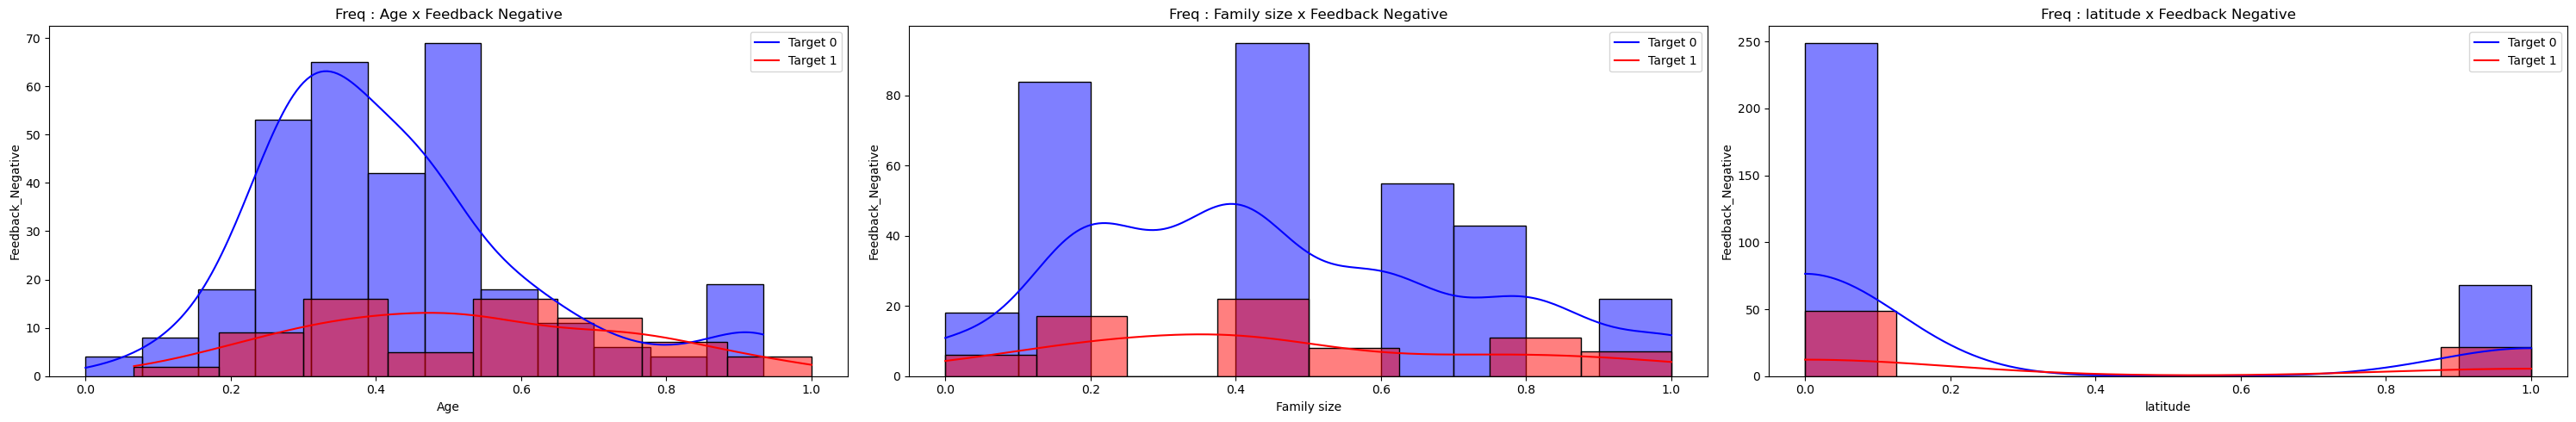

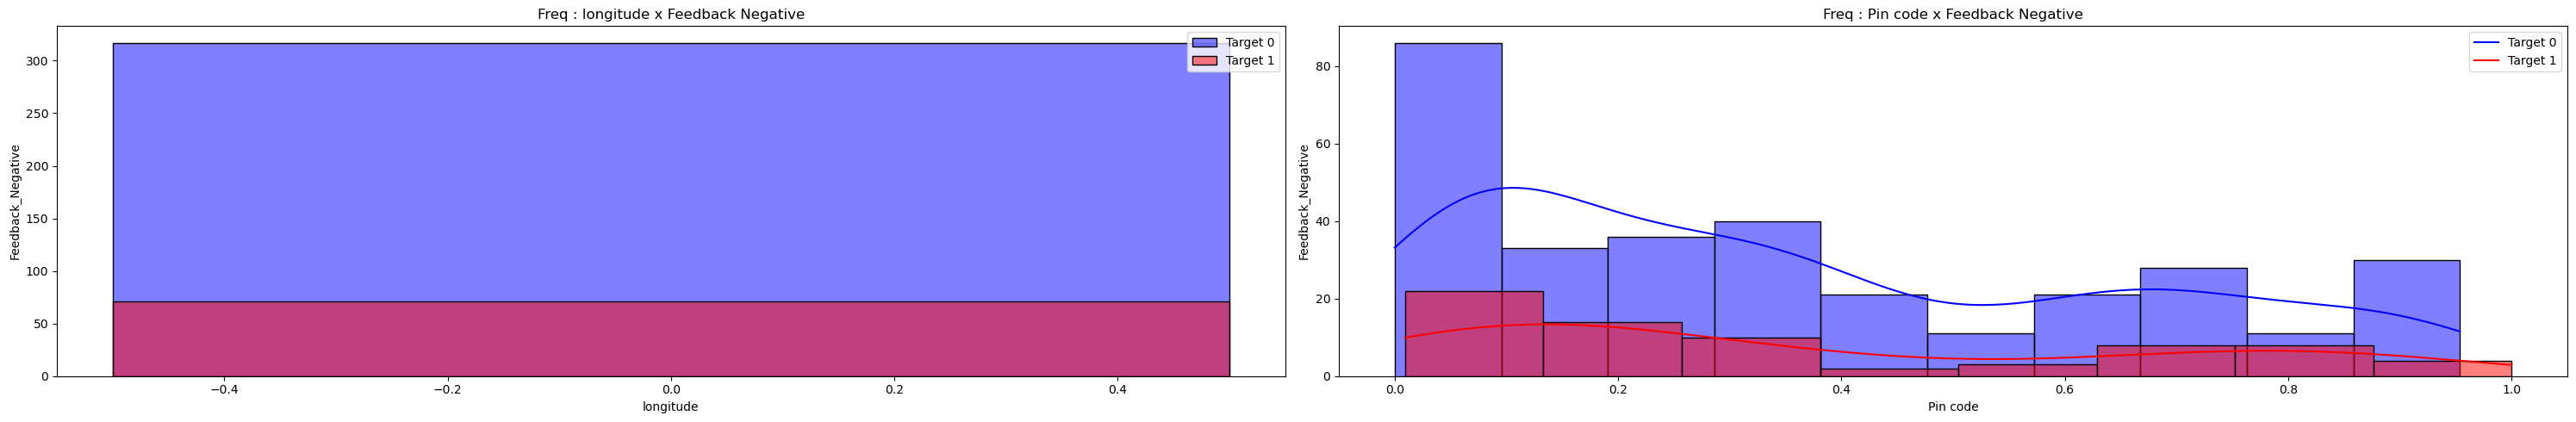

In [16]:
def histplot (num_plot, column):

    col_0 = df_final[df_final["Feedback_Negative"] == 0][column]
    col_1 = df_final[df_final["Feedback_Negative"] == 1][column]

    sns.histplot(col_0, color="blue", label="Target 0", kde=True, ax=axs[num_plot])
    sns.histplot(col_1, color="red", label="Target 1", kde=True, ax=axs[num_plot])
    axs[num_plot].set_xlabel(column)
    axs[num_plot].set_ylabel('Feedback_Negative')
    axs[num_plot].set_title(f"Freq : {column} x Feedback Negative")
    axs[num_plot].legend(["Target 0", "Target 1"])


fig, axs = plt.subplots(1,3, figsize=(30,5))
histplot(0, "Age")
histplot(1, "Family size")
histplot(2, "latitude")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1,2, figsize=(30,5))
histplot(0, "longitude")
histplot(1, "Pin code")
plt.tight_layout()
plt.show()

In [17]:
df_final = df_final.drop("longitude", axis=1)

In [18]:
def freq_bar(num_plot, column):

    prop_target = df_final[df_final['Feedback_Negative'] == 1].groupby(column).size()
    prop_all = df_final.groupby(column).size()
    percentages = (prop_target / prop_all) * 100

    # bars
    counts = (df_final[column].value_counts(normalize=True) * 100).round(2)
    axs[num_plot].bar(counts.index, counts.values, color='gray')
    axs[num_plot].set_ylabel('Examples %')
    axs[num_plot].set_xlabel(column)
    axs[num_plot].set_title(f'Share examples: {column}')
    axs[num_plot].set_ylim(0, 100)

    # second index : % target
    ax2 = axs[num_plot].twinx()

    percentages.plot.line(ax=ax2, marker='o', color='red')
    ax2.set_ylabel('% Target')
    ax2.set_ylim(0, 100)

    # bar labels
    #for i, v in enumerate(counts):
    #    axs[num_plot].text(i, v, f"{v:.1f}", ha='center', color='black', fontweight='bold')
    
    # line labels
    for i, v in enumerate(percentages):
        ax2.text(i, v+2, f"{v:.1f}%", ha='center', color='black', fontweight='bold')
    
    axs[num_plot].set_xticks(range(len(counts.index)))
    axs[num_plot].set_xticklabels(counts.index, rotation=45)


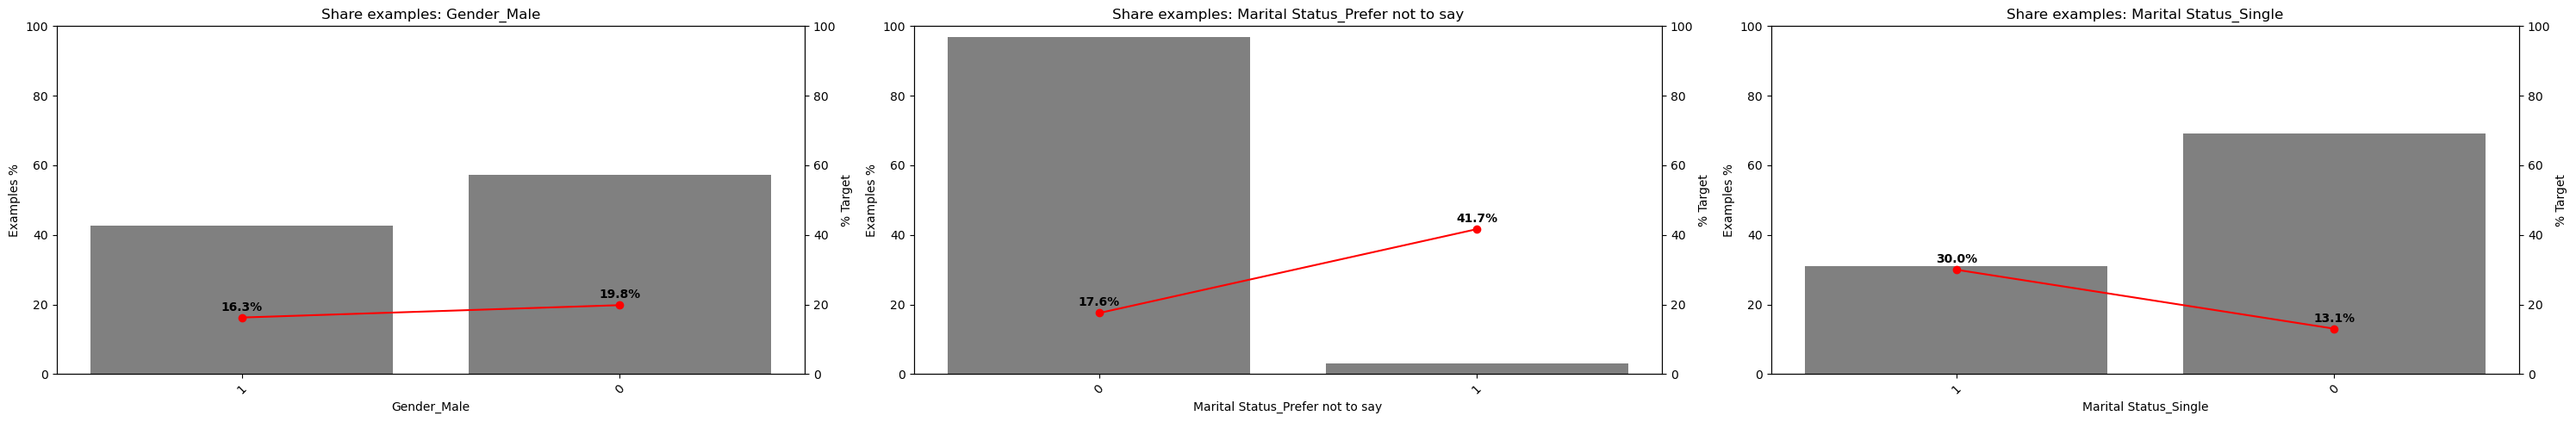

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))
freq_bar(0, "Gender_Male")
freq_bar(1, "Marital Status_Prefer not to say")
freq_bar(2, "Marital Status_Single")
plt.tight_layout()
plt.show()

# DF Modeling

In [20]:
df_model = df_final.copy()
df_model

,Age,Family size,latitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Negative
0,0.133333,0.6,0.0,0.000000,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
1,0.400000,0.4,0.0,0.074074,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,0.266667,0.4,0.0,0.148148,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1
3,0.266667,1.0,0.0,0.166667,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0.266667,0.6,0.0,0.083333,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.333333,0.2,0.0,0.000000,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
384,0.333333,0.6,0.0,0.435185,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
385,0.266667,0.8,0.0,0.083333,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
386,0.333333,0.2,0.0,0.074074,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [21]:
df_model.to_csv("data/df_model.csv", index=False)